# Sentiment analysis
> - naver movier review

In [1]:
import csv
from pprint import pprint

# tsv load
with open('corpus/naver_movie_corpus/ratings_train.txt', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f, delimiter='\t')
    naver_train = list(rdr)
    naver_train = naver_train[1:]
    
with open('corpus/naver_movie_corpus/ratings_test.txt', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f, delimiter='\t')
    naver_test = list(rdr)
    naver_test = naver_test[1:]

pprint(naver_train[35:42])

[['4726746', '패션에 대한 열정! 안나 윈투어!', '1'],
 ['7203432', '키이라 나이틀리가 연기하고자 했던건 대체 정신장애일까 틱장애일까', '0'],
 ['112724', '허허...원작가 정신나간 유령이라... 재미있겠네요!', '1'],
 ['1105872', '포스터는 있어보이는데 관객은 114명이네', '0'],
 ['4805788', '이 영화가 왜 이렇게 저평가 받는지 모르겠다', '1'],
 ['9336496', '단순하면서 은은한 매력의 영화', '1'],
 ['9994900',
  "'다 알바생인가 내용도 없고 무서운거도 없고 웃긴거도 하나도 없음 완전 별싱거운 영화.ㅇ.ㅇ내ㅇ시간 넘 아까움 .. . 완전 낚임",
  '0']]


In [2]:
# pos tagging, tokenizing
from tqdm import tqdm_notebook
from konlpy.tag import Twitter
tagger = Twitter()

# *****pos tagging에 시간 좀 걸립니다******
def tokenize(doc):
    return ['/'.join(t) for t in tagger.pos(doc, norm=True, stem=True)]

sentences = []
naver_tot = tqdm_notebook(naver_train+naver_test)
for sentence in naver_tot:
    sentences.append(tokenize(sentence[1]))

A Jupyter Widget

In [3]:
print('문장 총 개수: ', len(sentences))
for i in range(5):
    print(sentences[i])

문장 총 개수:  200000
['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증/Noun', '나다/Verb', '목소리/Noun']
['흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍다/Adjective', '않다/Verb']
['너무/Noun', '재/Noun', '밓었/Noun', '다/Josa', '그래서/Adverb', '보다/Verb', '추천/Noun', '하다/Verb']
['교도소/Noun', '이야기/Noun', '구먼/Noun', '../Punctuation', '솔직하다/Adjective', '재미/Noun', '는/Josa', '없다/Adjective', '../Punctuation', '평점/Noun', '조정/Noun']
['사이몬페그/Noun', '의/Josa', '익살/Noun', '스런/Josa', '연기/Noun', '가/Josa', '돋보이다/Verb', '영화/Noun', '!/Punctuation', '스파이더맨/Noun', '에서/Josa', '늙다/Verb', '보이다/Verb', '하다/Verb', '크다/Verb', '스틴/Noun', '던스트/Noun', '가/Josa', '너무나/Noun', '도/Josa', '이쁘다/Adjective', '보이다/Verb']


In [4]:
from gensim import models

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
%%time
size=100
model = models.Word2Vec(size=size, window=7, min_count=1, workers=8,alpha=0.025, min_alpha=0.025)

model.build_vocab(sentences) # 오로지 한번만 스트럭팅 가능

# learning_rate를 낮춰가며 여러번 트레이닝
for epoch in range(15):
    if epoch%1 ==0:
        print('epoch:',epoch, 'train completed')
    model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

epoch: 0 train completed


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  # Remove the CWD from sys.path while we load stuff.


epoch: 1 train completed
epoch: 2 train completed
epoch: 3 train completed
epoch: 4 train completed
epoch: 5 train completed
epoch: 6 train completed
epoch: 7 train completed
epoch: 8 train completed
epoch: 9 train completed
epoch: 10 train completed
epoch: 11 train completed
epoch: 12 train completed
epoch: 13 train completed
epoch: 14 train completed
Wall time: 1min 29s


In [6]:
model.wv.vocab

{'아/Exclamation': <gensim.models.keyedvectors.Vocab at 0x1baadb88860>,
 '더빙/Noun': <gensim.models.keyedvectors.Vocab at 0x1bab0561b38>,
 '../Punctuation': <gensim.models.keyedvectors.Vocab at 0x1bad9779860>,
 '진짜/Noun': <gensim.models.keyedvectors.Vocab at 0x1bad9779908>,
 '짜증/Noun': <gensim.models.keyedvectors.Vocab at 0x1bad9779ba8>,
 '나다/Verb': <gensim.models.keyedvectors.Vocab at 0x1bad9779b70>,
 '목소리/Noun': <gensim.models.keyedvectors.Vocab at 0x1bad979d630>,
 '흠/Noun': <gensim.models.keyedvectors.Vocab at 0x1bad979d668>,
 '.../Punctuation': <gensim.models.keyedvectors.Vocab at 0x1bad979d6a0>,
 '포스터/Noun': <gensim.models.keyedvectors.Vocab at 0x1bad979d6d8>,
 '보고/Noun': <gensim.models.keyedvectors.Vocab at 0x1bad979d710>,
 '초딩/Noun': <gensim.models.keyedvectors.Vocab at 0x1bad979d748>,
 '영화/Noun': <gensim.models.keyedvectors.Vocab at 0x1bad979d780>,
 '줄/Noun': <gensim.models.keyedvectors.Vocab at 0x1bad979d7b8>,
 '..../Punctuation': <gensim.models.keyedvectors.Vocab at 0x1bad979d7

---
>이후론 노래가사 분류와 거의 동일합니다

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [14]:
# 20단어 이상만 골라내기
data = [(sentences[idx][:20], el[2]) for idx,el in enumerate(naver_tot) if len(sentences[idx])>=20]
data_x = [i[0] for i in data]
data_y = [int(i[1]) for i in data]

# split test set 20%
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=3)

# split validation set 2%
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.02, random_state=3)

In [17]:
# print('나/Noun => \n ----vector---- \n', model.wv.get_vector('나/Noun'))
print(X_train[0], '=>\n------vector-------\n')
pprint([model.wv.get_vector(i) for i in X_train[0]])

['근본/Noun', '적/Suffix', '으로/Josa', '시나리오/Noun', '와/Josa', '연출/Noun', '력/Suffix', '의/Josa', '부재/Noun', './Punctuation', '유아인/Noun', '김해숙/Noun', '두/Noun', '배우/Noun', '만/Josa', '믿다/Verb', '가다/Verb', '망/Noun', '하다/Verb', '영화/Noun'] =>
------vector-------

[array([ 3.523114  ,  2.015463  , -1.672692  , -0.3061365 , -2.357136  ,
        2.4908454 , -0.671811  ,  0.84004676,  0.3540945 , -1.1933886 ,
        0.13313134, -1.3479699 ,  0.13244626,  0.26690397, -1.7275543 ,
       -0.3791245 ,  2.5234802 , -1.2091707 , -2.6268072 , -0.8956418 ,
        0.256632  , -1.5417013 ,  0.04141175,  1.8735298 ,  2.669829  ,
        1.713975  , -1.9371195 , -1.5729722 ,  4.090522  , -0.20688547,
       -0.44081804,  0.67791694, -1.2013606 , -2.2616982 , -2.4704685 ,
       -0.20342062,  1.689332  , -1.6784313 ,  0.98809254, -0.69269466,
        0.66791356, -0.8443159 ,  0.6661656 ,  2.4853733 , -1.6957191 ,
        0.91674095, -0.910791  , -0.01096455, -1.2682519 ,  1.5480775 ,
        0.05654995,  1.0871

      dtype=float32),
 array([ 1.3998957 ,  4.79642   ,  1.2775594 ,  5.922116  , -1.6890681 ,
       -1.1036729 , -2.4785788 ,  1.2592345 ,  0.42819604,  4.697395  ,
       -1.4961671 , -3.3417284 ,  1.8025972 ,  1.0675466 , -1.6232675 ,
        1.8871434 , -3.1087477 , -0.41139445, -0.7174335 , -0.12085987,
       -0.888324  ,  5.5666757 , -3.752662  , -0.06563415,  3.1294954 ,
       -0.37336892,  0.5840562 ,  5.9367304 ,  1.6898999 , -0.30485478,
        3.3994846 , -1.2731456 ,  1.595106  , -0.8056787 ,  3.0239527 ,
        1.9807079 , -0.52597606,  3.8949935 , -0.57170194, -2.0196052 ,
       -0.29550025, -1.5091397 ,  6.401265  ,  4.33043   , -3.6147816 ,
        1.4474893 , -0.9492586 , -1.9199327 ,  2.785033  , -1.991953  ,
       -5.805435  , -1.9983647 , -2.3711226 , -3.7525578 ,  0.5435829 ,
       -3.6729975 ,  0.38961717,  3.3108995 ,  7.2287784 , -2.0896237 ,
       -4.587809  , -0.44456455, -1.7063583 , -0.28675336, -2.6685915 ,
        0.4499094 ,  1.2818404 ,  1.66085

      dtype=float32),
 array([-1.4231893 ,  3.9092705 , -0.42166457,  0.7255472 ,  0.44010726,
        2.3114202 ,  0.6094935 , -1.6076314 ,  1.94675   ,  2.5574462 ,
       -2.7845376 , -1.2300572 ,  1.1375029 ,  4.836616  ,  0.76988184,
        0.29853123,  2.339758  , -2.8065195 , -2.4812355 ,  1.5302631 ,
       -2.1657977 ,  4.2697577 ,  3.8986156 , -0.10182939,  1.4574379 ,
       -0.6081168 ,  1.9164215 ,  2.044213  , -1.8941112 , -0.58353686,
        4.1176233 , -0.77418053, -2.5030003 , -2.7690141 , -2.7680197 ,
       -0.21821351, -2.4935043 ,  0.10045005,  1.9287376 , -1.568975  ,
       -2.131468  ,  0.33050337,  2.2263117 , -2.7828043 , -3.5628471 ,
       -4.307679  , -4.084198  , -0.27374718, -0.88348424,  4.403882  ,
       -0.78674185, -0.9337582 ,  0.49449828,  0.90438277,  2.264544  ,
        2.155259  ,  0.7863723 ,  0.5177205 , -0.73019516, -0.7438538 ,
        2.0331361 , -0.7553429 , -0.01986418, -0.05510501, -1.6945064 ,
       -3.909087  , -1.4118866 , -0.50490

      dtype=float32),
 array([ 0.53816134, -0.4781651 , -0.8813138 ,  0.1407631 , -0.02184986,
       -1.7502713 ,  3.8734598 , -3.6271398 , -1.4907817 ,  3.011742  ,
       -2.8705165 ,  1.0142101 ,  4.001999  ,  1.2612242 ,  1.4653287 ,
       -0.7089983 , -1.0504881 ,  0.2869804 , -0.66321   , -1.4925789 ,
        4.3481197 ,  4.0572143 ,  1.063119  , -1.1363884 ,  1.3173603 ,
        1.9993873 ,  0.6979356 ,  3.7701669 ,  4.011848  ,  3.9907289 ,
        2.1601572 ,  5.1474547 , -2.1321025 ,  1.3184553 , -0.35696906,
       -1.0682086 , -1.6265709 , -2.340786  ,  2.7024574 , -0.72557557,
       -3.0761502 , -0.8481701 ,  3.4944975 ,  1.5467155 ,  0.44291285,
       -0.5512843 , -1.6700474 ,  0.9947884 ,  0.1971013 , -1.1526513 ,
       -2.145804  , -1.8797396 ,  2.0803812 , -1.3826011 , -1.2531428 ,
        1.0485885 , -2.3620431 ,  1.575839  ,  1.2299603 , -2.2257824 ,
       -0.8621524 ,  0.80577874, -0.09848893,  0.5058035 , -2.641991  ,
       -0.3403394 ,  0.47524938,  0.75560

In [18]:
sess = tf.InteractiveSession()
Y_train = sess.run(tf.one_hot(Y_train, 2))
Y_val = sess.run(tf.one_hot(Y_val, 2))
Y_test = sess.run(tf.one_hot(Y_test, 2))
print([len(X_train),len(X_train[0])], [len(Y_train),len(Y_train[0])], [len(X_val),len(X_val[0])], [len(Y_val),len(Y_val[0])], len(Y_test))

[32763, 20] [32763, 2] [669, 20] [669, 2] 8359


In [19]:
tf.reset_default_graph()
# train Parameters
seq_length = 20
data_dim = 100
hidden_dim = 100
output_dim = 2
learning_rate = 0.001
epoch = 5
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length*data_dim])
X_re = tf.reshape(X, [-1, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, output_dim])

# 2-layer LSTM 
cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True)
                                    for _ in range(2)], state_is_tuple=True) # multiple layers
outputs, _states = tf.nn.dynamic_rnn(cell, X_re, dtype=tf.float32)
fc1 = tf.contrib.layers.fully_connected(outputs[:, -1], 100, activation_fn=tf.nn.relu)  # We use the last cell's output

Y_pred = tf.contrib.layers.fully_connected(fc1, output_dim, activation_fn=None)  # We use the last cell's output
hypothesis = tf.nn.softmax(Y_pred)

# cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train_step = optimizer.minimize(cost)

# prediction
predicted = tf.argmax(hypothesis, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))

total_iter = epoch*int(len(X_train)/batch_size) # 총 학습횟수
print('total iteration:', total_iter, '...')

total iteration: 1635 ...


In [20]:
# 각 단어들에 word embedding
def tok_embedding(tok_vec):
    w2v_vec = []
    for i in tok_vec: # 그냥 vec넣으면 134170 다들어감 메모리 절대 부족!!! 파이프라인 구축 필요
        temp =[]
        for j in i:
            try:
                temp += list(model.wv.get_vector(j))
            except:
                temp += list(mean)
        w2v_vec.append(temp)
#     reshape은 텐서플로에서 함
#     w2v_vec = np.array(w2v_vec, dtype='float16')
#     return w2v_vec.reshape([-1,200,embed_dim])
    return w2v_vec

# 피처 데이터, 레이블, 미니배치 갯수, random sampling
import random
def getMiniBatch2(x, y, n):
    if len(x) != len(y):
        print('Feature and label num is not equal.')
        return
    rand_idx = random.sample(list(range(len(x))), n)
    x_ = [x[i] for i in rand_idx]
    y_ = [y[i] for i in rand_idx]
    return tok_embedding(x_), y_

In [21]:
%%time
#----------------------
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
sess.run(tf.global_variables_initializer())

x_range=[]
train_accuracies=[]
val_accuracies=[]
val_costs=[]
X_val_tok = tok_embedding(X_val)

for i in range(total_iter):
    X_, Y_ = getMiniBatch2(X_train, Y_train, batch_size) # 랜덤 미니배치 할당
    train_step.run(feed_dict={X:X_, Y:Y_})

#   아래에 결과 프린트용
    if i % 10 == 0:   
        train_accuracy = accuracy.eval(feed_dict={X:X_, Y:Y_})
        val_accuracy, val_cost = sess.run([accuracy, cost], feed_dict={X:X_val_tok, Y:Y_val})
        
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        val_costs.append(val_cost)
        x_range.append(i)
        print('step %d: acc_tr %g, acc_tt %g, val_cost %g' % (i, train_accuracy, val_accuracy, val_cost))

step 0: acc_tr 0.73, acc_tt 0.523169, val_cost 0.691297
step 10: acc_tr 0.77, acc_tt 0.701046, val_cost 0.565839
step 20: acc_tr 0.75, acc_tt 0.757848, val_cost 0.484081
step 30: acc_tr 0.82, acc_tt 0.768311, val_cost 0.477281
step 40: acc_tr 0.85, acc_tt 0.759342, val_cost 0.464327
step 50: acc_tr 0.81, acc_tt 0.77429, val_cost 0.450117
step 60: acc_tr 0.84, acc_tt 0.780269, val_cost 0.462533
step 70: acc_tr 0.78, acc_tt 0.77429, val_cost 0.450756
step 80: acc_tr 0.81, acc_tt 0.775785, val_cost 0.439686
step 90: acc_tr 0.73, acc_tt 0.778774, val_cost 0.432335
step 100: acc_tr 0.75, acc_tt 0.780269, val_cost 0.446435
step 110: acc_tr 0.82, acc_tt 0.804185, val_cost 0.426193
step 120: acc_tr 0.79, acc_tt 0.810164, val_cost 0.418895
step 130: acc_tr 0.88, acc_tt 0.811659, val_cost 0.425149
step 140: acc_tr 0.8, acc_tt 0.80867, val_cost 0.419596
step 150: acc_tr 0.8, acc_tt 0.811659, val_cost 0.417256
step 160: acc_tr 0.85, acc_tt 0.801196, val_cost 0.429181
step 170: acc_tr 0.82, acc_tt 

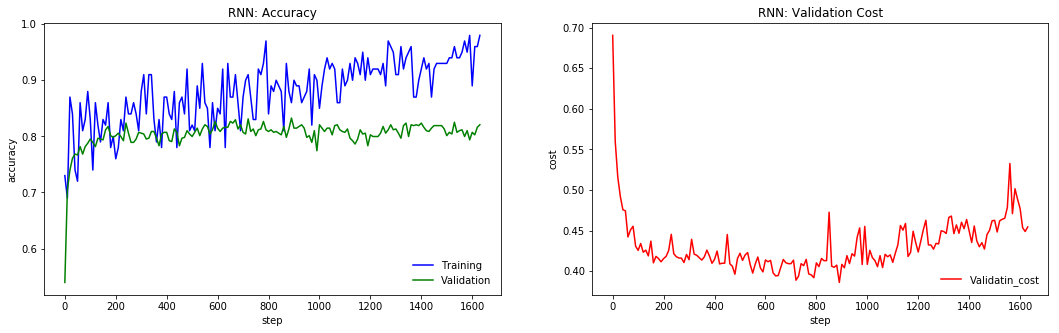

In [153]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(x_range, train_accuracies,'-b', label='Training')
plt.plot(x_range, val_accuracies,'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.title('RNN: Accuracy')

plt.subplot(122)
plt.plot(x_range, val_costs,'-r', label='Validatin_cost')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('cost')
plt.xlabel('step')
plt.title('RNN: Validation Cost')
plt.show()

In [154]:
# 전체 테스트셋 정확도
acc = accuracy.eval(feed_dict={X: tok_embedding(X_test), Y: Y_test})
print('test accuracy:', acc)

print('0: negative, 1: positive')
pred = predicted.eval(feed_dict={X: tok_embedding([X_test[0]])}) 
print(X_test[0], 'label:', tf.argmax(Y_test[0]).eval(), 'predicted', pred)

test accuracy: 0.810863
0: negative, 1: positive
['정말/Noun', '여운/Noun', '이/Josa', '많이/Adverb', '남다/Verb', '영화/Noun', '다/Josa', './Punctuation', '청소년/Noun', '들/Suffix', '이/Josa', '못/Noun', '보다/Verb', '것/Noun', '에/Josa', '많다/Adjective', '안타깝다/Adjective', '움/Noun', '이/Josa', '남다/Verb'] label: 1 predicted [1]
